In this exercise we will play with a classical Boston Property Dataset.  It describes the prices of 
properties in Boston in '70. The task is to understand how they depend on multiple factors. Please 
consider the following URL for more details https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

    
Note the list of considered variables. Varianble number 14: MEDV - Median value of owner-occupied homes 
in $1000's is the descriptive variable we want to understand. 
In order to avoid extensve file processing, two files boston and boston_prices have been prepared for you. 
In the code below we read them and create the Ball Mapper plot.

This notebook was prepared by Davide Gurnari. 

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
#%matplotlib inline

In [2]:
points_df = pd.read_csv('data/boston', sep='\t', 
                     header=None, names=['V'+str(i) for i in range(1,14)])
print(points_df.shape)
points_df.head()

(506, 13)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
values_df = pd.read_csv('data/boston_prices', header=None, names=['price'])
print(values_df.shape)
values_df.head()

(506, 1)


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Create Ball Mapper

In [4]:
from pyBallMapper import BallMapper

In [5]:
bm = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                coloring_df = values_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                epsilon = 100) # the radius of the balls

D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecate

In [6]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

my_rainbow_palette = cm.get_cmap(name='viridis')

In [7]:
# we can color the graph by any column in coloring_df
bm.color_by_variable('price', my_rainbow_palette)

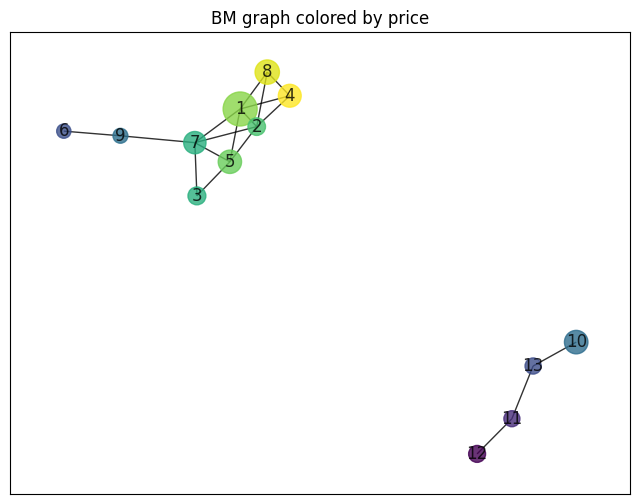

In [9]:
plt.figure(figsize= (8,6))

nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=42),
                 node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                 node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                           norm = plt.Normalize(vmin=bm.min_color_value, 
                                                vmax=bm.max_color_value))
#plt.colorbar(sm)
plt.title('BM graph colored by price')
plt.show()

## More coloring

Since our dataset is relativelly low dimensional, we may use each of 13 atriutes to see how it is distributed along the plot. Can you spot which variable seems to be most different among clusters?

In [10]:
bm = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                coloring_df = points_df, # a dataframe with the coloring functions (in this case the pointcloud itself)
                epsilon = 100) # the radius of the balls

D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, avg in coloring_df.loc[self.Graph.nodes[node]['points covered']].mean().iteritems():
D:\DataScience\TDA_py\TDA-Tutorial\TDA_tutorial-p2\03 python_ball_mapper\pyBallMapper.py:60: FutureWarning: iteritems is deprecate

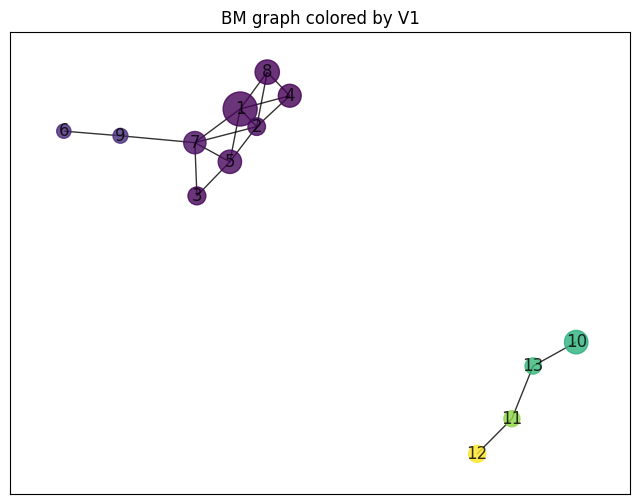

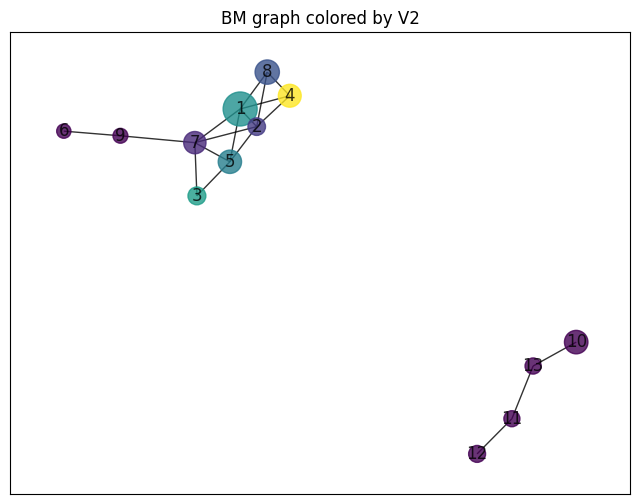

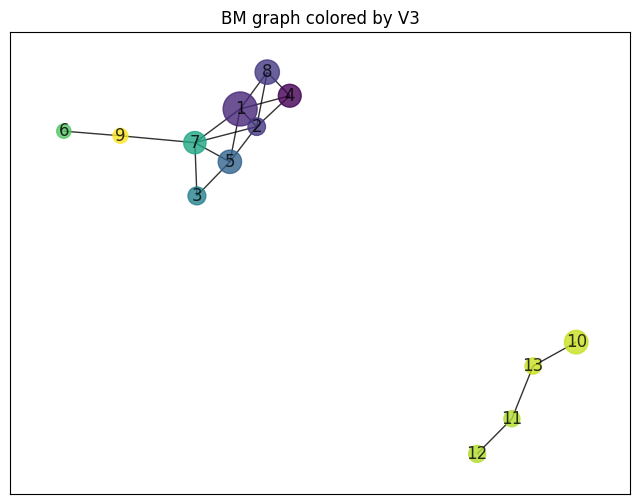

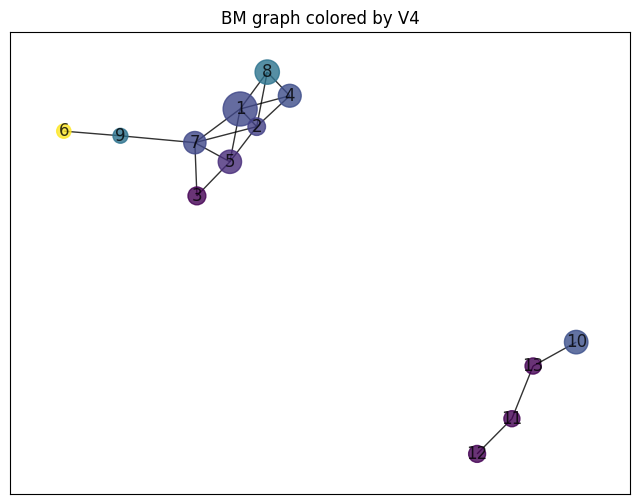

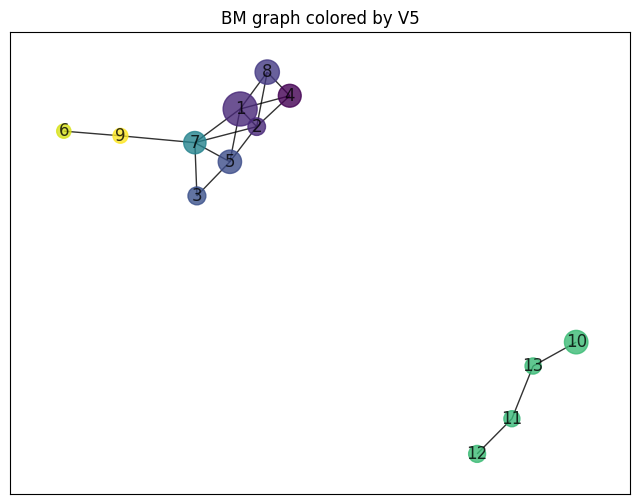

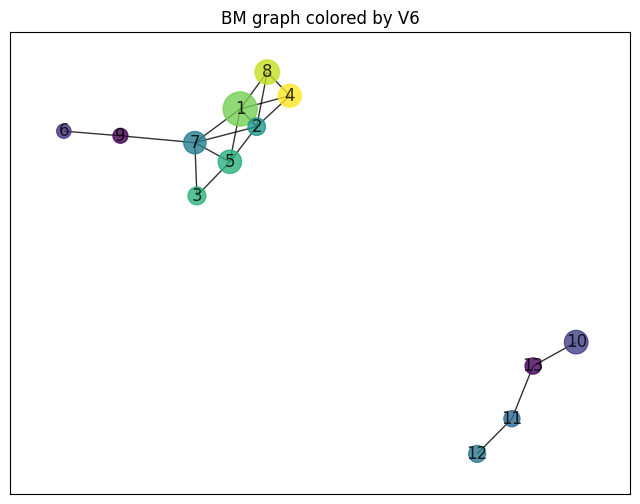

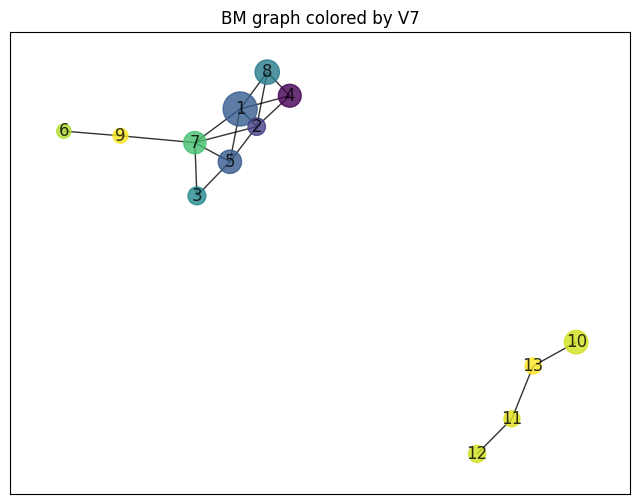

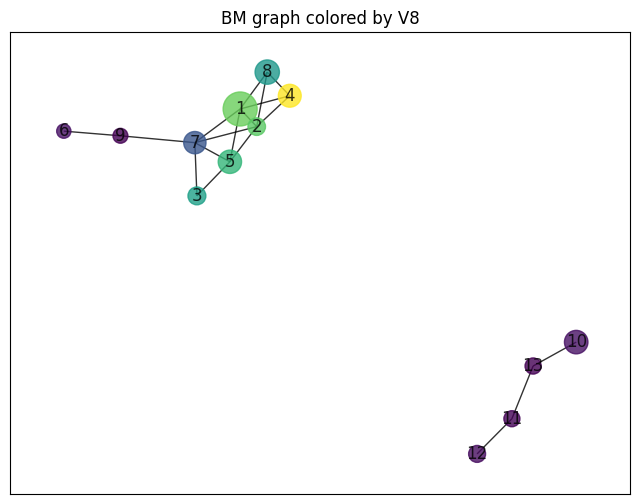

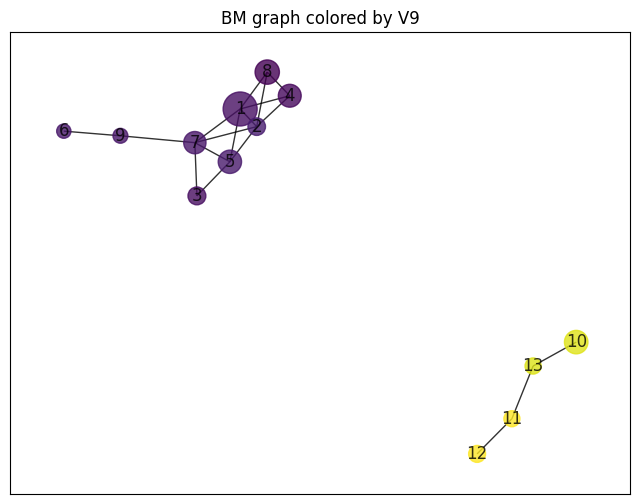

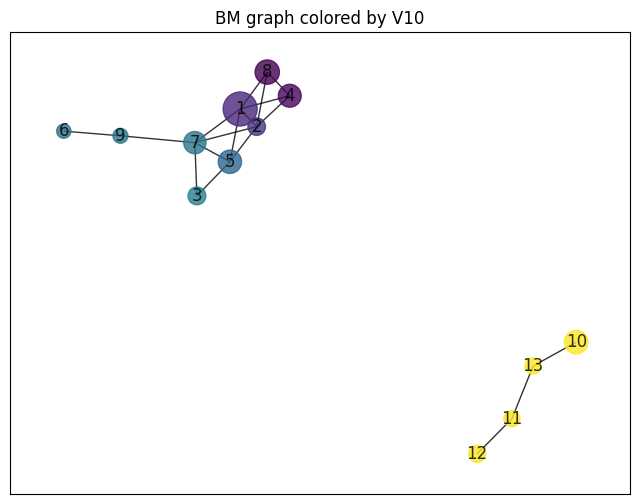

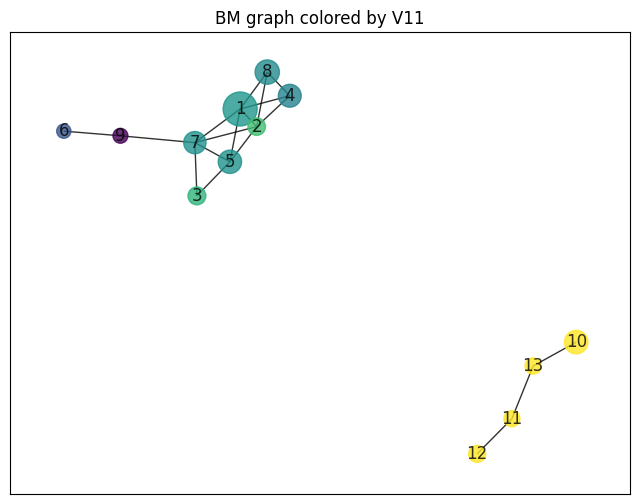

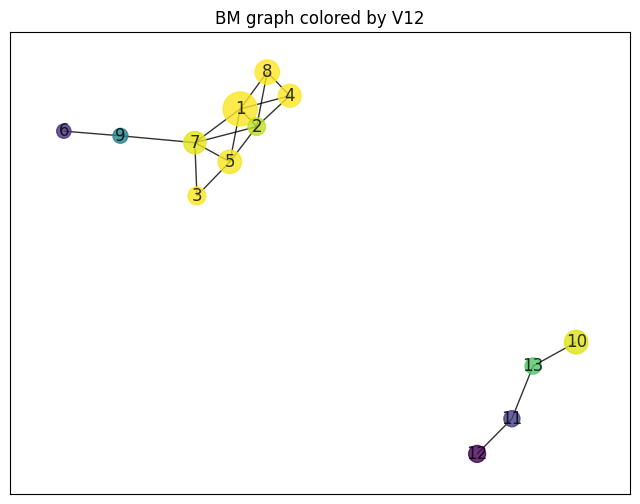

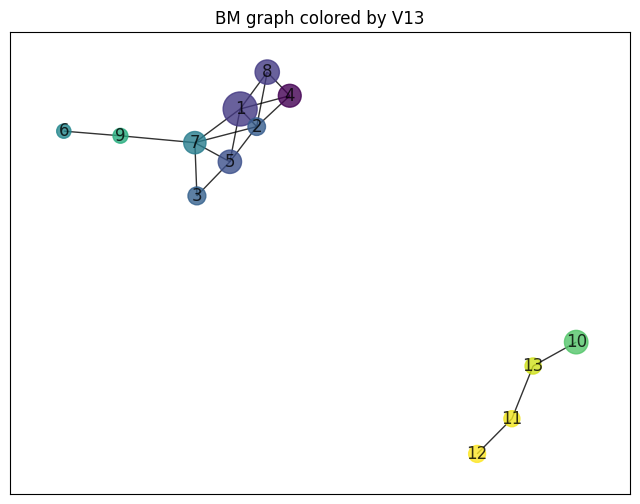

In [11]:
for variable in points_df.columns:
    # we can color the graph by any column in coloring_df
    bm.color_by_variable(variable, my_rainbow_palette)
    
    plt.figure(figsize= (8,6))
    # plot the graph
    nx.draw_networkx(bm.Graph, 
                     pos=nx.spring_layout(bm.Graph, seed=42),
                     node_color = [bm.Graph.nodes[node]['color'] for node in bm.Graph.nodes],
                     node_size =  [bm.Graph.nodes[node]['size rescaled'] for node in bm.Graph.nodes],
                     alpha=0.8)

    # plot a legend
    sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                               norm = plt.Normalize(vmin=bm.min_color_value, 
                                                    vmax=bm.max_color_value))
    #plt.colorbar(sm)
    plt.title('BM graph colored by {}'.format(variable))
    plt.show()

## Comparing averages

Let us try to validate the observation from the previous point. By comparing the averages of two distributions (given by variables in the predefined regions of the graph) and returning the largest one.

In [12]:
small = [10,11,12,13]
large = list(range(1,10))

In [13]:
points_in_small = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in small]))

In [14]:
points_in_large = np.unique(np.concatenate([bm.points_covered_by_landmarks[node] 
                                            for node in large]))

In [15]:
points_df.iloc[points_in_small].mean()

V1      12.299162
V2       0.000000
V3      18.451825
V4       0.058394
V5       0.670102
V6       6.006212
V7      89.967883
V8       2.054470
V9      23.270073
V10    667.642336
V11     20.196350
V12    291.039051
V13     18.674526
dtype: float64

In [16]:
points_df.iloc[points_in_large].mean()

V1       0.388774
V2      15.582656
V3       8.420894
V4       0.073171
V5       0.511847
V6       6.388005
V7      60.632249
V8       4.441272
V9       4.455285
V10    311.926829
V11     17.809214
V12    381.042575
V13     10.417453
dtype: float64

In [17]:
# absolute difference of the average, divided by the average in the whole dataset
(abs(points_df.iloc[points_in_small].mean() - points_df.iloc[points_in_large].mean()) \
/ points_df.mean()).sort_values(ascending=False)

V1     3.296059
V9     1.970257
V2     1.371274
V3     0.900703
V10    0.871345
V13    0.652575
V8     0.628926
V7     0.427790
V5     0.285300
V12    0.252341
V4     0.213627
V11    0.129345
V6     0.060750
dtype: float64

This function somewhat confirms that the largest difference is obtained on the crime rate (variable 1), while the second largest on the index of accessibility to radial highway (communication indicator).